In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("brazil_covid19.csv")
data.tail()

,date,region,state,cases,deaths
1696,2020-04-01,Sudeste,Rio de Janeiro,832,28
1697,2020-04-01,Sudeste,São Paulo,2981,164
1698,2020-04-01,Sul,Paraná,224,3
1699,2020-04-01,Sul,Rio Grande do Sul,306,4
1700,2020-04-01,Sul,Santa Catarina,235,2


## Specifying by State (São Paulo)
### Creating dataframe

In [5]:
sp = pd.DataFrame(columns=["cases", "deaths"])#, index=ind)
last_date = None
for i in range(1700):
    if data["state"][i] == "São Paulo":
        actual_date = data["date"][i]
        if actual_date == last_date:
            pass
        d = {'date': [data["date"][i]], 'cases': [data["cases"][i]], 'deaths':[data["deaths"][i]]}
        aux = pd.DataFrame(data=d)
        sp = sp.append(aux)
        last_date = actual_date

sp = sp.set_index("date")

# drop consecutives loop
# print(sp.index.size)
# j = 0
# for i in range(sp.index.size - 1):
#     if sp.index[i] == sp.index[i+1]:
#         sp = sp.drop([sp.index[i]], axis=0)
#         print("Consecutive!")
#         i += 1
#         j += 1
#     if i >= sp.index.size - j:
#         break
#sp.index = ind
print(sp.index.size)
sp.head()



63


,cases,deaths
date,,
2020-01-30,0,0
2020-01-31,0,0
2020-02-01,0,0
2020-02-02,0,0
2020-02-03,0,0


In [7]:
## Creating common index for all dataframes
import datetime
v =  []
date = datetime.datetime(2020, 1, 30)
for i in range(sp.index.size + 20):
    date_str = date.strftime(format="%Y-%m-%d")
    v.append(date_str)
    date += datetime.timedelta(days=1)
ind = pd.Index(v)
ind[:5]

Index(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03'], dtype='object')

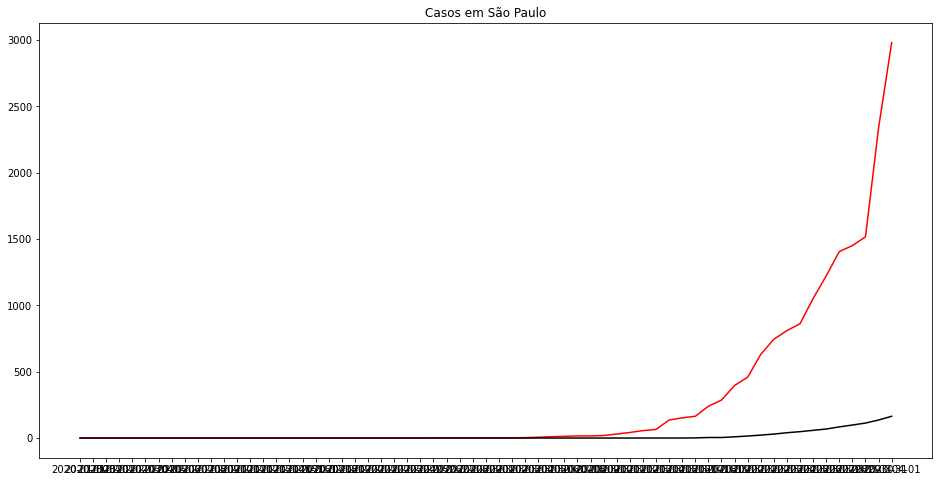

In [9]:
# Plotting cases

plt.figure(1, (16, 8))
plt.title("Casos em São Paulo")
plt.plot(sp.index, sp["cases"], color="red")
plt.plot(sp.index, sp["deaths"], color="black")

In [10]:
# Assuming:

mortality_rate = 0.01 #1% mortality rate
double_time = 7 # 7 days to double number of infecteds
days_until_death = 20 # 20 days from contamination to death

In [11]:
import datetime

In [12]:
print(sp.index)

Index(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01'],
      dtype='object', name

In [13]:
estimation = pd.Series(dtype='int64', index=ind)
estimation.tail()
estimation_2 = pd.Series(dtype='int64', index=ind)
estimation.tail()

2020-04-17    0
2020-04-18    0
2020-04-19    0
2020-04-20    0
2020-04-21    0
dtype: int64

In [14]:
print(sp.index.size)
date = datetime.datetime(2020, 1, 31)
date_str = date.strftime(format="%Y-%m-%d")
# estimation = pd.Series(dtype='int64', index=sp.index)
#estimation = estimation.loc[estimation.shift() != estimation]
for i in range(sp.index.size - days_until_death -2):
    date_str = date.strftime(format="%Y-%m-%d")
    future_date = date + datetime.timedelta(days=days_until_death)
    future_date_str = future_date.strftime(format="%Y-%m-%d")
    print(future_date_str)
    previous_date_str = (date - datetime.timedelta(days=1)).strftime(format="%Y-%m-%d")
    estimation[date_str] = estimation[previous_date_str] + (1/mortality_rate) * sp["deaths"][future_date_str]
    date += datetime.timedelta(days=1)
estimation.tail()

63
2020-02-20
2020-02-21
2020-02-22
2020-02-23
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-02-29
2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29
2020-03-30
2020-03-31


2020-04-17    0
2020-04-18    0
2020-04-19    0
2020-04-20    0
2020-04-21    0
dtype: int64

## Modeling exponential growth
### The estimated cases by death statistics double with time, exponentially
$p = p0*e^{\tau.t}$ => $2*p = p*e^{\tau.td}$


$e^{\tau.td}$ = 2

$\tau = ln(2)/td$

In [15]:
date = datetime.datetime(2020, 1, 31)
tau = np.log(2)/double_time

for i in range(sp.index.size):
    date_str = date.strftime(format="%Y-%m-%d")
    for j in range(sp.index.size-i):
        
        future_date = date + datetime.timedelta(days=1)
        #print(future_date_str)
        future_date_str = future_date.strftime(format="%Y-%m-%d")
        #print(estimation[date_str])
        #print(tau*j)
        estimation_2[future_date_str] += np.floor(estimation[date_str]*np.exp(tau*j))
    date += datetime.timedelta(days=1)
estimation.tail()

2020-04-17    0
2020-04-18    0
2020-04-19    0
2020-04-20    0
2020-04-21    0
dtype: int64

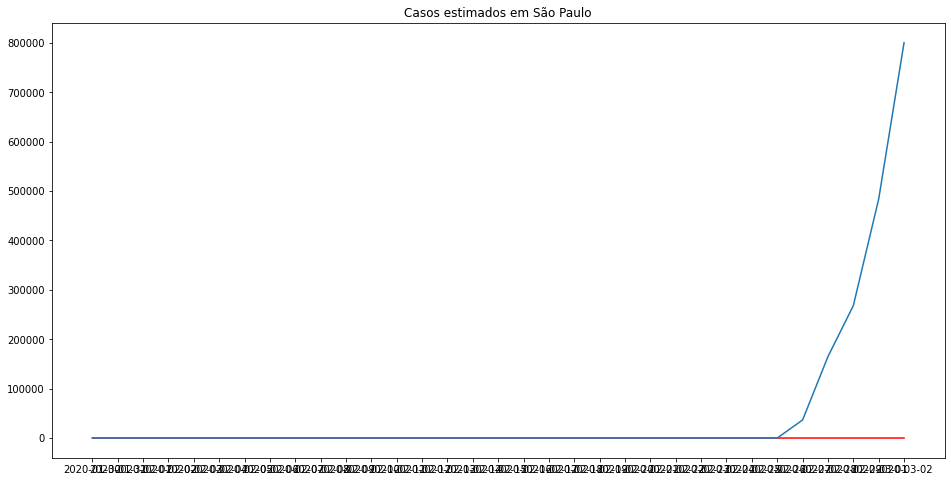

In [16]:
plt.figure(1, (16, 8))
plt.title("Casos estimados em São Paulo")
n=33
plt.plot(sp.index[:n], sp["cases"][:n], color="red")
plt.plot(estimation_2.index[:n], estimation_2[:n])

In [17]:
print("{} cases in {}".format(estimation_2[32], estimation_2.index[20]))

800516 cases in 2020-02-19


## Estimating growth rate
### Fit a linear regression model to the logarithm of confirmed cases graph to estimate it's growth

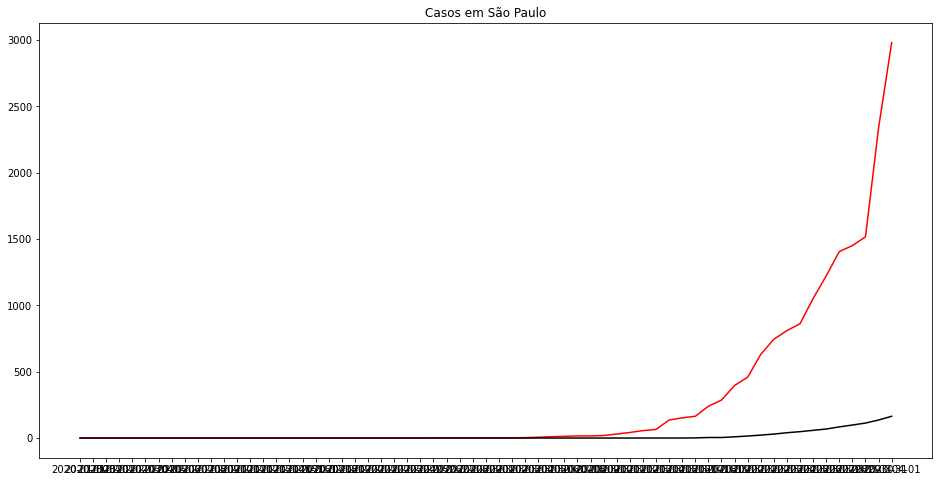

In [18]:
plt.figure(1, (16, 8))
plt.title("Casos em São Paulo")

plt.plot(sp.index, sp["cases"], color="red")
plt.plot(sp.index, sp["deaths"], color="black")

In [33]:
log_cases = pd.Series(dtype='int64', index=ind)
print(sp["cases"].size)
print(ind.size)

for i in range(sp["cases"].size):
    if sp["cases"][i] != 0:
        log_cases[ind[i]] = np.log(sp["cases"][i])
    else:
        log_cases[ind[i]] = -10.0

63
83


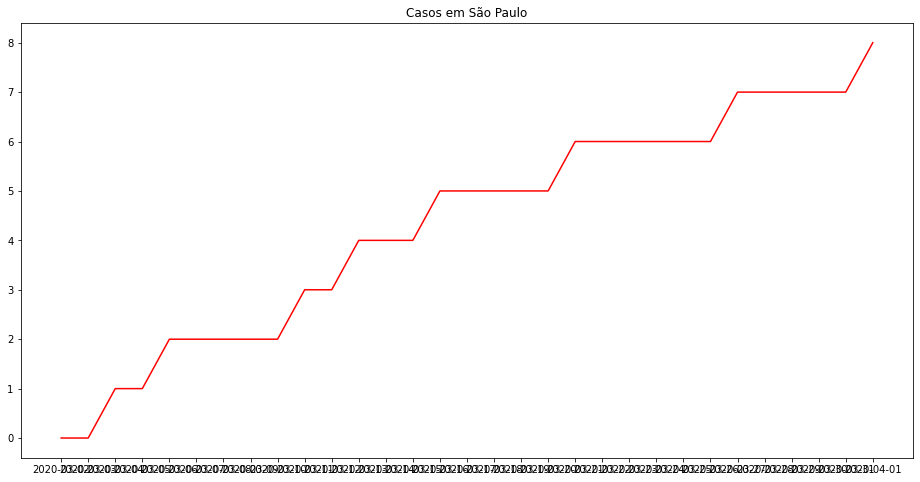

In [35]:
plt.figure(1, (16, 8))
plt.title("Casos em São Paulo")
n1 = 32
n2 = sp["cases"].size

plt.plot(log_cases.index[n1:n2], log_cases[n1:n2], color="red")

In [36]:
a, b = np.polyfit(range(n2-n1), log_cases[n1:n2], deg=1)
print("y = {}*x + {}".format(a, b))
print(tau)

y = 0.24798387096774197*x + 0.6028225806451611
0.09902102579427789


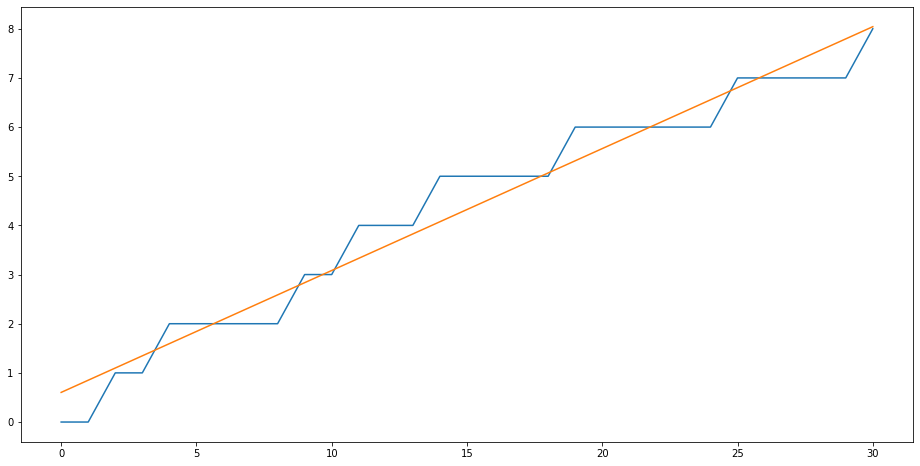

In [37]:
plt.figure(1, (16, 8))
plt.plot(range(n2-n1), log_cases[n1:n2])
plt.plot(range(n2-n1), a*range(n2-n1) + b)

In [38]:
date = datetime.datetime(2020, 1, 31)
tau = a

for i in range(sp.index.size):
    date_str = date.strftime(format="%Y-%m-%d")
    for j in range(sp.index.size-i):
        
        future_date = date + datetime.timedelta(days=1)
        #print(future_date_str)
        future_date_str = future_date.strftime(format="%Y-%m-%d")
        #print(estimation[date_str])
        #print(tau*j)
        estimation_2[future_date_str] += np.floor(estimation[date_str]*np.exp(tau*j))
    date += datetime.timedelta(days=1)
estimation.tail()

2020-04-17    0
2020-04-18    0
2020-04-19    0
2020-04-20    0
2020-04-21    0
dtype: int64

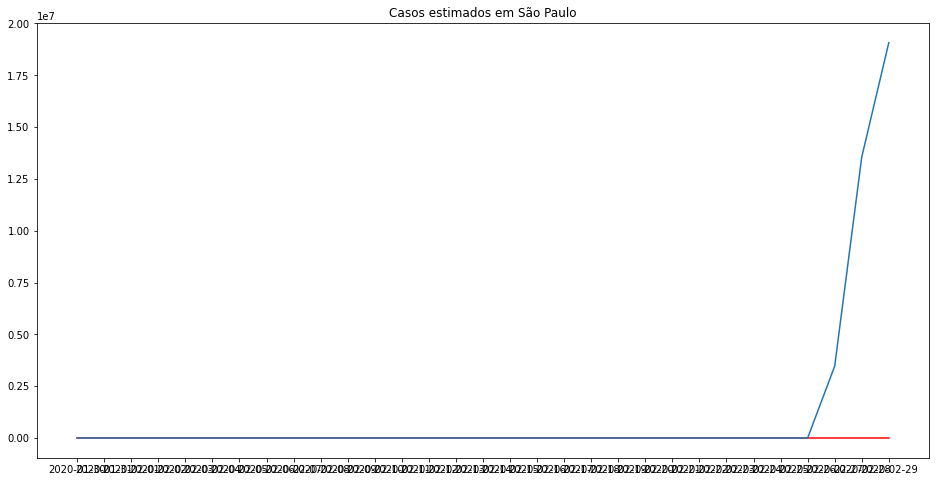

In [39]:
plt.figure(1, (16, 8))
plt.title("Casos estimados em São Paulo")
n=31
plt.plot(sp.index[:n], sp["cases"][:n], color="red")
plt.plot(estimation_2.index[:n], estimation_2[:n])

In [57]:
estimation_2[42]

83680986